# DEMO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
import pandas as pd
from scipy import stats

from monte_carlo_rv import monte_carlo_rv

# Initial

## Generate One Exponential RV

In [ ]:
def exp_inverse_cdf(u: float or NDArray, l: float = 1):
    """
    :param u: uniform value to generate from
    :param l: lambda value of exponential distribution

    :return: exp(l) RV
    """
    return -1 / l * np.log(1 - u)


u = np.random.uniform()
print(u, exp_inverse_cdf(u, 2))

## Generate 100 RVs

In [ ]:
u = np.random.uniform(size=20)
print(u)
exps = exp_inverse_cdf(u, 1)
print(exps)

## Plot

In [ ]:
plt.figure()
plt.hist(exps)
plt.show()

## Statistics

In [ ]:
# stats.kstest(exps, exp_inverse_cdf)
print(pd.DataFrame(exps).describe())
print("90%     {:.6f}".format(np.quantile(exps, 0.9, axis=0)))
print("95%     {:.6f}".format(np.quantile(exps, 0.95, axis=0)))
print("99%     {:.6f}".format(np.quantile(exps, 0.99, axis=0)))
print(stats.kstest(exps, stats.expon.cdf))

In [ ]:
STATS = ['count', 'mean', 'std', 'min', '0.01', '0.05', '0.10', '0.25', '0.50', '0.75', '0.90', '0.95', '0.99', 'max', 'ks', 'ad']

cdf = {
    'alpha': stats.alpha.cdf,
    'anglit': stats.anglit.cdf,
    'arcsine': stats.arcsine.cdf,
    'argus': stats.argus.cdf,
    'beta': stats.beta.cdf,
    'betaprime': stats.betaprime.cdf,
    'bradford': stats.bradford.cdf,
    'burr': stats.burr.cdf,
    'burr12': stats.burr12.cdf,
    'cauchy': stats.cauchy.cdf,
    'chi': stats.chi.cdf,
    'chi2': stats.chi2.cdf,
    'cosine': stats.cosine.cdf,
    'crystalball': stats.crystalball.cdf,
    'dgamma': stats.dgamma.cdf,
    'dweibull': stats.dweibull.cdf,
    'erlang': stats.erlang.cdf,
    'expon': stats.expon.cdf,
    'exponential': stats.expon.cdf,
    'exponnorm': stats.exponnorm.cdf,
    'exponweib': stats.exponweib.cdf,
    'exponpow': stats.exponpow.cdf,
    'f': stats.f.cdf,
    'fatiguelife': stats.fatiguelife.cdf,
    'fisk': stats.fisk.cdf,
    'foldcauchy': stats.foldcauchy.cdf,
    'foldnorm': stats.foldnorm.cdf,
    'genlogistic': stats.genlogistic.cdf,
    'gennorm': stats.gennorm.cdf,
    'genpareto': stats.genpareto.cdf,
    'genexpon': stats.genexpon.cdf,
    'genextreme': stats.genextreme.cdf,
    'gausshyper': stats.gausshyper.cdf,
    'fatiguelife': stats.fatiguelife.cdf,
}

def _get_dist_cdf(dist: str):
    """
    """
    if dist == 'normal':
        pass


def _get_statistics(rvs: list, dist: str, statistics: list):
    """Calculate and print desired statistics.

    :param rvs
    """
    statistics_dict = {}
    if 'count' in statistics:
        statistics_dict['count'] = len(rvs)
        # print('count:\t\t{:.6f}'.format(statistics_dict['count']))
    if 'mean' in statistics:
        statistics_dict['mean'] = np.mean(rvs)
        # print('mean:\t\t{:.6f}'.format(statistics_dict['mean']))
    if 'std' in statistics:
        statistics_dict['std'] = np.std(rvs)
        # print('std:\t\t{:.6f}'.format(statistics_dict['std']))
    if 'min' in statistics:
        statistics_dict['min'] = np.min(rvs)
        # print('min:\t\t{:.6f}'.format(statistics_dict['min']))
    for s in statistics:
        try:
            tmp = float(s)
            statistics_dict[str(round(tmp*100, 2))] = np.quantile(rvs, tmp)
            # print('{}%:\t\t{:.6f}'.format(round(tmp*100, 2), statistics_dict[str(round(tmp*100, 2))]))
        except  Exception as e:
            pass
    if 'max' in statistics:
        statistics_dict['max'] = np.max(rvs)
        # print('max:\t\t{:.6f}'.format(statistics_dict['max']))
    if any(s in statistics for s in ['ks', 'kolmogorov']):
        statistics_dict['ks'] = stats.kstest(rvs, dist.cdf)
        # print(statistics_dict['ks'])
    if any(x in statistics for x in ['ad', 'anderson']):
        statistics_dict['ad'] = stats.anderson(rvs, 'norm')
        # print(statistics_dict['ad'])
    return np.array(list(statistics_dict.values()))


def get_theoretic_quatiles(dist, quartiles: list):
    """
    """
    return dist.ppf(quartiles)


def monte_carlo_simulate_rv(dist, n: int = 10_000, sample: int = 100, statistics: list = STATS):
    """
    """
    # to save all the results out
    rvs = []
    statistics_iter_dict = {}
    # perform monte carlo estimation
    for i in range(n):
        if i % 100 == 0:
            print(i)
        # sample n number of random variables
        rvs.append(dist.ppf(np.random.uniform()))
        # print statistics
        statistics_iter_dict[i+1] = _get_statistics(rvs, dist, statistics)
        # plot
        # plt.figure()
        # plt.hist(rvs, bins=20)
        # plt.show()
    # return the array of statistics at each iteration
    return statistics_iter_dict, rvs

## RUN

In [ ]:
s = ['count', 'mean', 'std', 'min', '0.01', '0.05', '0.10', '0.25', '0.50', '0.75', '0.90', '0.95', '0.99', 'max']
# run simulation
sim_run, rvs = monte_carlo_simulate_rv(
    stats.kstwobign,
    n = 50_000,
    statistics = s
)

## Plot Statistics

In [ ]:
def plot_monte_carlo_statistic(statistic: str, statistics: list):
    """Create a scatter/line plot for a given statistic.

    :param statistic: Name of statistic to plot.
    :param statistics: List of statistics calculated during simulation.

    :return: None
    """
    i = statistics.index(statistic)
    plt.figure()
    plt.plot(list(sim_run.keys()), [x[i] for x in list(sim_run.values())])
    plt.title(statistic)
    plt.xlabel("Samples")
    plt.ylabel("Average {} Value".format(statistic))
    plt.show()


# plot each statistic
for s1 in s:
    plot_monte_carlo_statistic(s1, s)

# Package

In [2]:
from monte_carlo_rv import monte_carlo_rv

mcrv = monte_carlo_rv(stats.kstwobign, 10_000)
mcrv.run(True)
mcrv.rvs

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


array([0.80254656, 0.80271977, 0.67987251, ..., 0.71900454, 1.01249037,
       0.76977412])

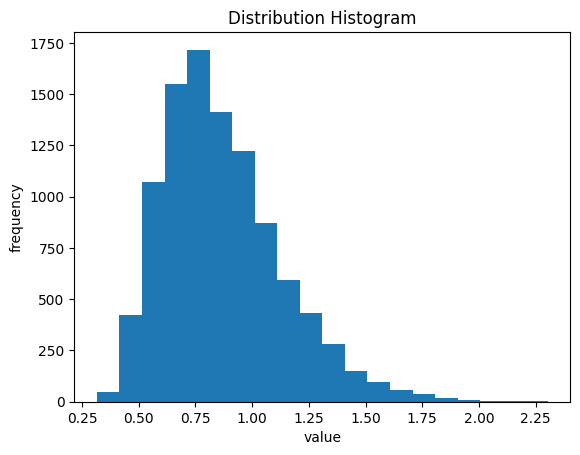

In [3]:
mcrv.plot()

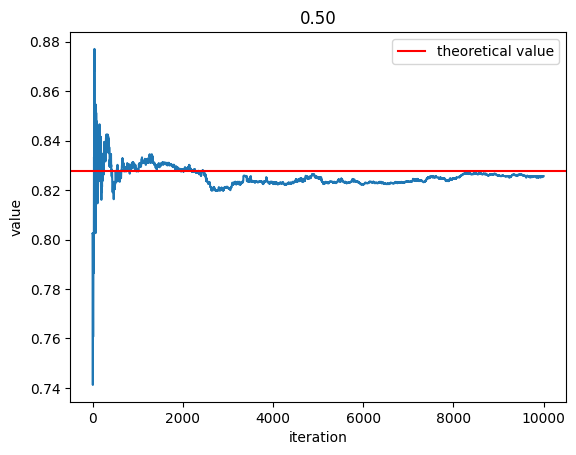

In [4]:
mcrv.plot_statistic('0.50')

In [5]:
mcrv.theoretical_quartiles(True)

Theoretical Quartile Values
min:		0.000000
1.0%:		0.441028
5.0%:		0.519610
10.0%:		0.571173
25.0%:		0.676448
50.0%:		0.827574
75.0%:		1.019185
90.0%:		1.223848
95.0%:		1.358099
99.0%:		1.627624
max:		inf


([0.0,
  0.4410276985179294,
  0.5196103791686225,
  0.5711732651063401,
  0.6764476915028201,
  0.8275735551899059,
  1.0191847202536857,
  1.2238478702170825,
  1.3580986393225505,
  1.6276236115189502,
  inf],
 ['min',
  '0.01',
  '0.05',
  '0.10',
  '0.25',
  '0.50',
  '0.75',
  '0.90',
  '0.95',
  '0.99',
  'max'])

In [6]:
mcrv.simulated_quartiles(True)

Simulated Quartile Values
min:		0.315591
1.0%:		0.437526
5.0%:		0.518091
10.0%:		0.572427
25.0%:		0.678098
50.0%:		0.825655
75.0%:		1.017446
90.0%:		1.227663
95.0%:		1.358363
99.0%:		1.638739
min:		2.304122


([0.3155908497449865,
  0.4375258885747552,
  0.5180910915134138,
  0.5724272143031456,
  0.6780981280082969,
  0.8256548252471464,
  1.017445616700761,
  1.227663085497303,
  1.3583633142948026,
  1.6387388213125276,
  2.3041221770545364],
 ['min',
  '0.01',
  '0.05',
  '0.10',
  '0.25',
  '0.50',
  '0.75',
  '0.90',
  '0.95',
  '0.99',
  'max'])